# Задача 1

In [2]:
import dataclasses
import typing
import random
import numpy as np

from matplotlib import pyplot as plt

START_TIME = 8 * 60
END_TIME = 20 * 60


@dataclasses.dataclass
class BusArrivalEntity:
    time: int
    passengers_count: int


BusesList = list[BusArrivalEntity]


def single_day(bus_time_func: typing.Callable) -> BusesList:
    """
    :param bus_time_func: a callable function invoked on determining new bus interval randomly
    """
    buses_entities: BusesList = list()

    minutes_passed = 0
    last_bus_went = 0
    next_bus_interval = 0
    while minutes_passed < (END_TIME - START_TIME):
        if last_bus_went == next_bus_interval:
            # <last_bus_went> passengers went away on the bus
            b_entity = BusArrivalEntity(
                time=minutes_passed,
                passengers_count=last_bus_went
            )
            buses_entities.append(b_entity)

            last_bus_went = 0
            next_bus_interval = bus_time_func()

        minutes_passed += 1
        last_bus_went += 1

    return buses_entities


def draw_hist(values: typing.Sequence, title=None, xlabel=None, ylabel='density'):
    bins = max(values) - min(values) + 1
    plt.hist(values, density=True, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [3]:

random.seed(10)

experiments_cnt = 10 ** 4
experiments_list: list[BusesList] = [single_day(
    bus_time_func=lambda: random.choice([5, 10])
) for _ in range(experiments_cnt)]


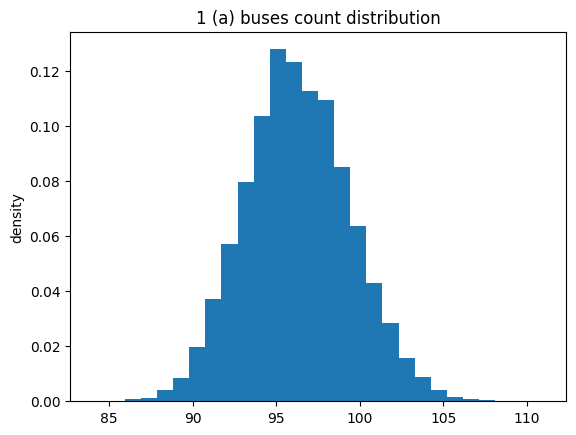


Похоже, что это нормальное распределение


In [4]:
# --- 1 (а) ---


def graph1(experiments: list):
    buses_cnt_values = [len(exp) for exp in experiments]
    draw_hist(buses_cnt_values, '1 (а) buses count distribution')

graph1(experiments_list)

print("\nПохоже, что это нормальное распределение")

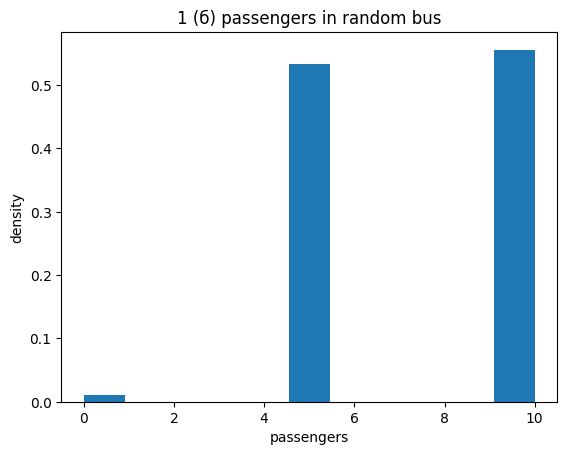

Mean:  7.477
Variance:  6.734471000000001

Значения 5 и 10 (практически) равновероятны, как и должно быть


In [5]:
# --- 1 (б) ---

random.seed(10)

def graph2(experiments: list):
    values_list: list[int] = list()

    for exp in experiments:
        bus_choice_i = random.randint(0, len(exp) - 1)
        bus_choice = exp[bus_choice_i]

        value = bus_choice.passengers_count
        values_list.append(value)

    draw_hist(values_list, '1 (б) passengers in random bus', 'passengers', 'density')

    print('Mean: ', np.mean(values_list))
    print('Variance: ', np.var(values_list))

graph2(experiments_list)

print("\nЗначения 5 и 10 (практически) равновероятны, как и должно быть")

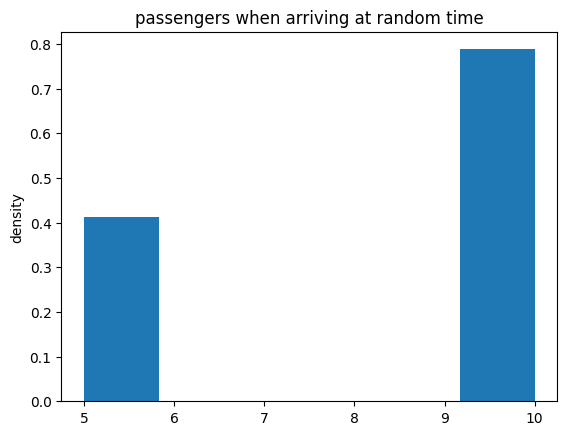

Mean:  8.284298857547265
Variance:  5.634875302050055

Comments:
Согласно парадоксу инспектора, более длинные промежутки (10мин) более вероятны


In [6]:
# --- 1 (в) ---

random.seed(10)

def graph3(experiments: list):
    def nearest_bigger(a: BusesList, time: int) -> int:
        i = 0
        while i < len(a) - 1 and a[i].time <= time:
            i += 1

        return i

    values_list: list[int] = list()

    for exp in experiments:
        timon_time_choice = random.randint(0, END_TIME - START_TIME)

        if timon_time_choice > exp[-1].time:
            # Тимон не попадет на автобус
            continue

        next_bus_ind: int = nearest_bigger(exp, timon_time_choice)
        next_bus = exp[next_bus_ind]

        value = next_bus.passengers_count
        values_list.append(value)

    draw_hist(values_list, 'passengers when arriving at random time')

    print('Mean: ', np.mean(values_list))
    print('Variance: ', np.var(values_list))


graph3(experiments_list)

print("\nComments:")
print("Согласно парадоксу инспектора, более длинные промежутки (10мин) более вероятны")

# Графики с экспоненциальным временем автобуса

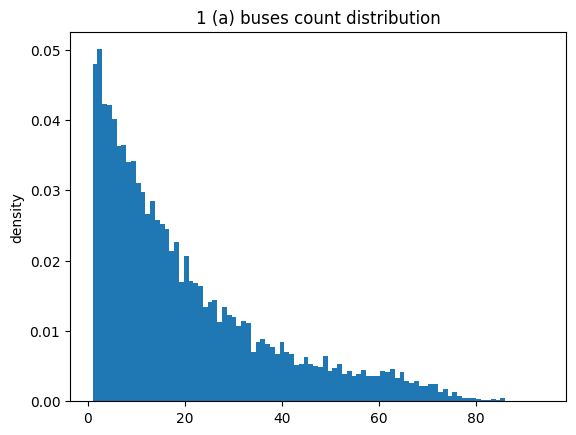

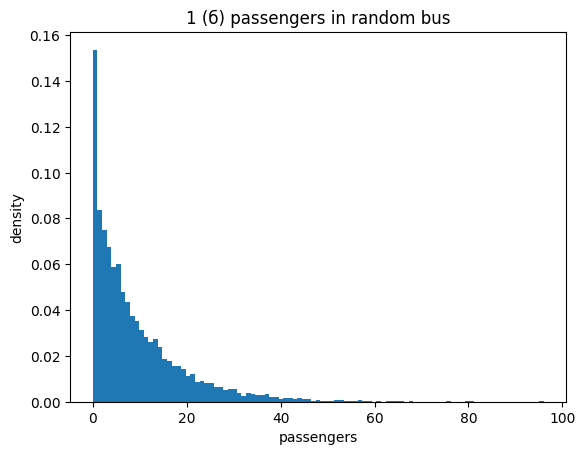

Mean:  8.869
Variance:  96.84303900000002


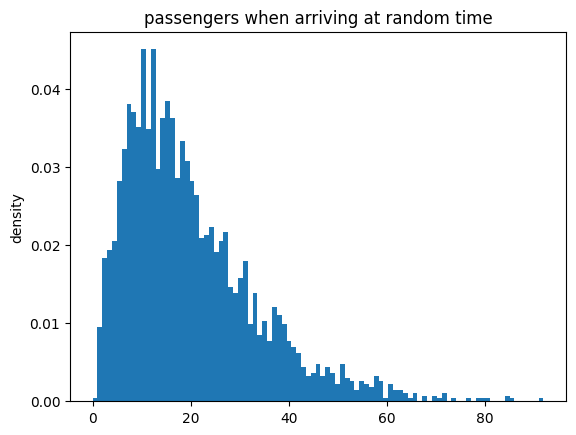

Mean:  19.781679942070962
Variance:  184.89114880704878


In [7]:
# --- 1 (г) ---

random.seed(10)


experiments_list_exp: list[BusesList] = [
    single_day(
        bus_time_func=lambda: round(random.expovariate(1 / 10))
    ) for _ in range(experiments_cnt)
]

graph1(experiments_list_exp)
graph2(experiments_list_exp)
graph3(experiments_list_exp)

1) На первом графике, количество автобусов похоже на экспоненциальное распределение

2) На втором графике, как и ожидалось количество пассажиров экспоненциально

3) На третьем графике, матожидание сместилось к 19, т.к. в парадоксе инспектора слишком маленькие промежуткиn маловероятны

# Задача 2

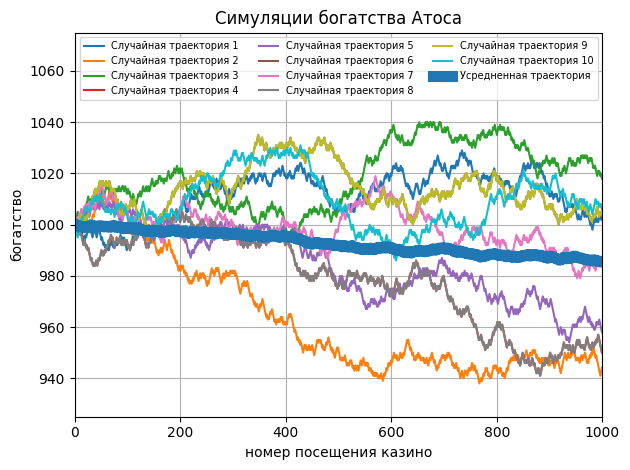

Comments:
Усредненная траектория идет вниз, т.к матожидание < 1


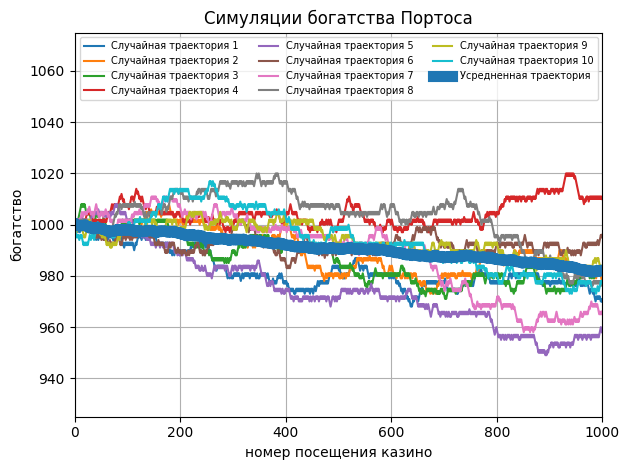

Comments:
Усредненная траектория также идет вниз, т.к матожидание < 1


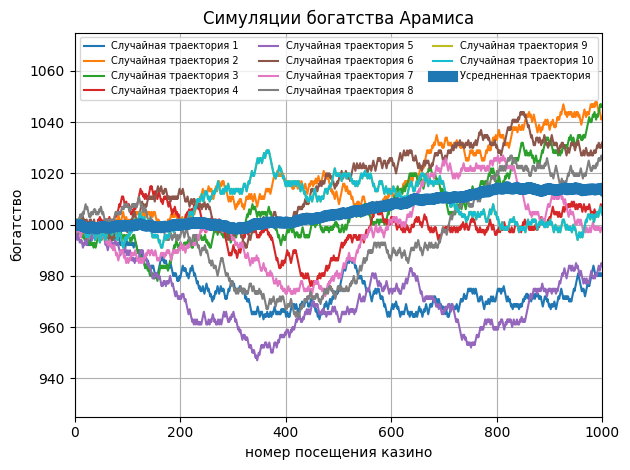

Comments:
Теперь же усредненная траектория идет вверх (согласно Парадоксу Паррондо)
Получается, что комбинация проигрышных игр может вести к выигрышу (матожидание > 1)


In [38]:
import random
import numpy as np

from matplotlib import pyplot as plt


def single_play_A(money: int):
    if random.random() <= 0.49:
        return money + 1
    else:
        return money - 1


def single_play_B(money: int):
    if money % 3 == 0:
        prob1 = 0.09
    else:
        prob1 = 0.74

    if random.random() <= prob1:
        return money + 1
    else:
        return money - 1


def simulate_finances_atos() -> list[int]:
    money = INITIAL_MONEY
    values_list = list()

    for _ in range(SIMULATION_SIZE):
        money = single_play_A(money)

        values_list.append(money)

    return values_list


def simulate_finances_portos() -> list[int]:
    money = INITIAL_MONEY
    values_list = list()

    for _ in range(SIMULATION_SIZE):
        money = single_play_B(money)

        values_list.append(money)

    return values_list


def simulate_finances_aramis() -> list[int]:
    money = INITIAL_MONEY
    values_list = list()

    for _ in range(SIMULATION_SIZE):
        if random.random() <= 0.5:
            money = single_play_A(money)
        else:
            money = single_play_B(money)
        values_list.append(money)

    return values_list


INITIAL_MONEY = 1000
SIMULATION_SIZE = 1000
SIMULATIONS_COUNT = 50 # 10 ** 4

random.seed(10)

atos_simulations: list[list[int]] = [simulate_finances_atos() for _ in range(SIMULATIONS_COUNT)]
portos_simulations: list[list[int]] = [simulate_finances_portos() for _ in range(SIMULATIONS_COUNT)]
aramis_simulations: list[list[int]] = [simulate_finances_aramis() for _ in range(SIMULATIONS_COUNT)]


def draw_simulations_graph(simulations_list: list[list[int]], title=None):
    averaged_simulation = np.mean(
        np.array(simulations_list),
        axis=0
    )

    rand_10_simulations = [random.choice(simulations_list) for _ in range(10)]

    x_start = 0
    x_end = x_start + SIMULATION_SIZE

    x_coords = [i for i in range(x_start, x_end)]

    y_delta = 75
    y_bottom = INITIAL_MONEY - y_delta
    y_top = INITIAL_MONEY + y_delta

    plt.grid()
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(x_start, x_end)
    plt.ylim(y_bottom, y_top)

    for i in range(len(rand_10_simulations)):
        values = rand_10_simulations[i]
        plt.plot(x_coords, values, label=f"Случайная траектория {i + 1}")
    plt.plot(x_coords, averaged_simulation, linewidth='8', label="Усредненная траектория")

    plt.xlabel("номер посещения казино")
    plt.ylabel("богатство")
    plt.title(title)
    plt.legend(
        ncol=3,
        fontsize="7"
    )
    plt.show()


draw_simulations_graph(atos_simulations, "Симуляции богатства Атоса")
print("Comments:")
print("Усредненная траектория идет вниз, т.к матожидание < 1")

draw_simulations_graph(portos_simulations, "Симуляции богатства Портоса")
print("Comments:")
print("Усредненная траектория также идет вниз, т.к матожидание < 1")

draw_simulations_graph(aramis_simulations, "Симуляции богатства Арамиса")
print("Comments:")
print("Теперь же усредненная траектория идет вверх (согласно Парадоксу Паррондо)")
print("Получается, что комбинация проигрышных игр может вести к выигрышу (матожидание > 1)")


# Задача 3

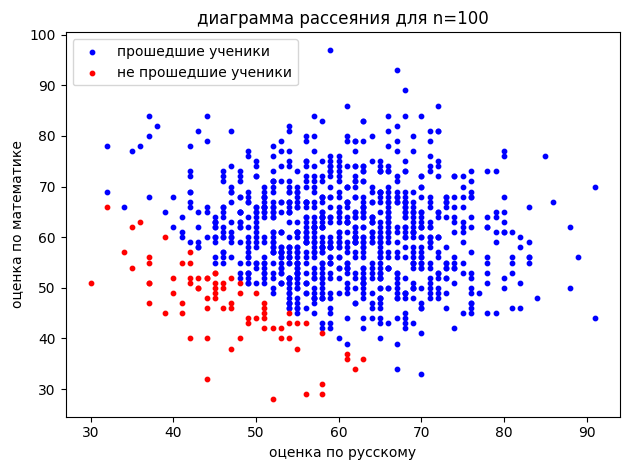

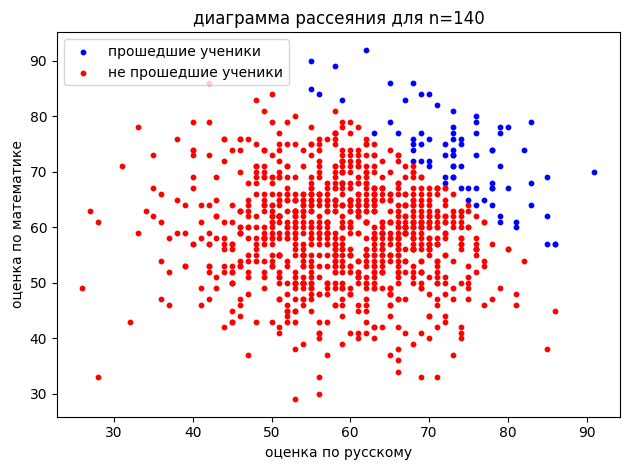

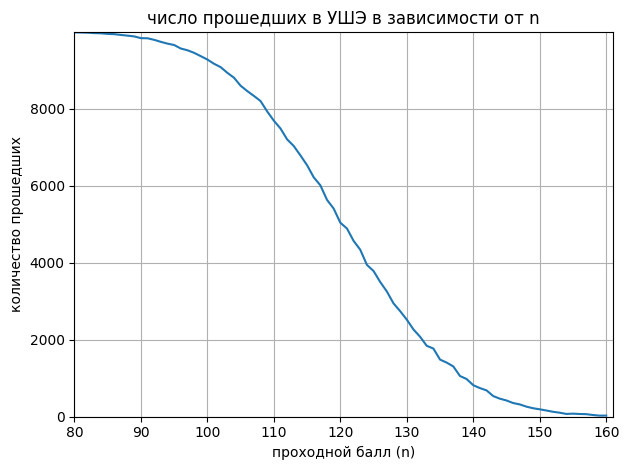

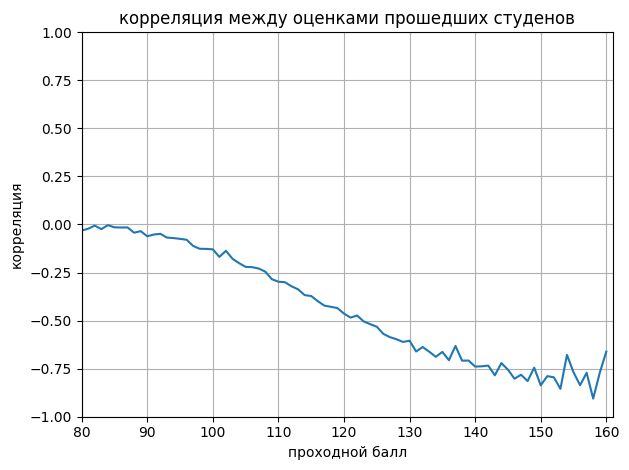

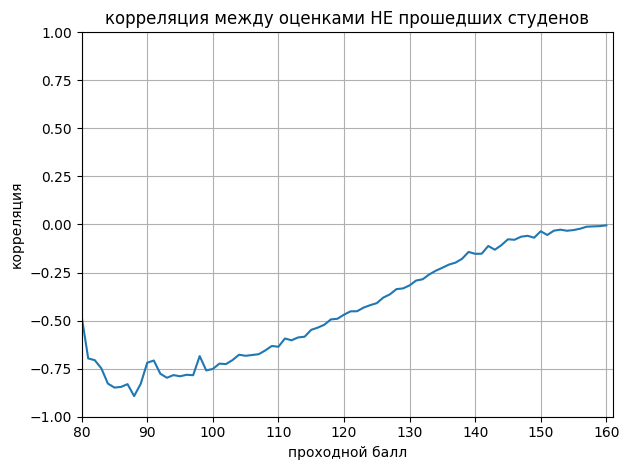

In [10]:
import random
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

random.seed(10)


def random_pupil() -> tuple[int, int]:
    return round(random.normalvariate(60, 10)), round(random.normalvariate(60, 10))


succeeded_count_list: list[int] = list()
succeeded_correlations: list[float] = list()
failed_correlations: list[float] = list()

for n in range(80, 160 + 1):
    pupils_count = 10 ** 4
    pupils_list: list[tuple[int, int]] = [random_pupil() for _ in range(pupils_count)]

    succeeded_pupils = list(filter(lambda x: (x[0] + x[1]) >= n, pupils_list))
    failed_pupils = list(filter(lambda x: (x[0] + x[1]) < n, pupils_list))

    succeeded_count_list.append(len(succeeded_pupils))

    def correlation(arr_2d: list[tuple[int, int]]):
        arr = np.array(arr_2d)
        x, y = arr.transpose()

        return stats.pearsonr(x, y)[0]

    # --- correlation calculation in `succeeded pupils` ---
    succeeded_correlations.append(correlation(succeeded_pupils))

    # --- correlation calculation in `failed pupils` ---
    failed_correlations.append(correlation(failed_pupils))


def scatter_graph(n: int):
    pupils_count = 1000
    pupils_list: list[tuple[int, int]] = [random_pupil() for _ in range(pupils_count)]

    succeeded_pupils = list(filter(lambda x: (x[0] + x[1]) >= n, pupils_list))
    failed_pupils = list(filter(lambda x: (x[0] + x[1]) < n, pupils_list))

    succ_x, succ_y = np.array(succeeded_pupils).transpose()
    fail_x, fail_y = np.array(failed_pupils).transpose()
    plt.scatter(succ_x, succ_y, color="blue", s=10, label="прошедшие ученики")
    plt.scatter(fail_x, fail_y, color="red", s=10, label="не прошедшие ученики")
    plt.title(f"диаграмма рассеяния для n={n}")
    plt.xlabel("оценка по русскому")
    plt.ylabel("оценка по математике")
    plt.legend()
    plt.show()

def graph1(values, y_bounds=None, title=None, xlabel=None, ylabel=None):
    x_start = 80
    x_end = x_start + len(values)

    x_coords = [i for i in range(x_start, x_end)]

    if not y_bounds:
        y_bottom = 0
        y_top = max(values)
    else:
        y_bottom, y_top = y_bounds

    plt.grid()
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(x_start, x_end)
    plt.ylim(y_bottom, y_top)

    plt.plot(x_coords, values)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


scatter_graph(100)
scatter_graph(140)

graph1(
    succeeded_count_list,
    title='число прошедших в УШЭ в зависимости от n',
    xlabel='проходной балл (n)',
    ylabel="количество прошедших"
)

graph1(
    succeeded_correlations, [-1, 1],
    title="корреляция между оценками прошедших студенов",
    xlabel="проходной балл",
    ylabel="корреляция"
)


graph1(
    failed_correlations, [-1, 1],
    title="корреляция между оценками НЕ прошедших студенов",
    xlabel="проходной балл",
    ylabel="корреляция"
)


Воспользуюсь двумя вспомогательными графиками (диаграммы рассеивания) для объяснения выводов.

При относительно небольшом n (1-ая диаграмма), большинство учеников из выборки проходит, поэтому между x и y практически нету корреляции.
Однако у тех кто не прошел, оценки по русскому и математике очень сильно обратно коррелируют друг с другом.

С повышением n (2-ая диаграмма), количество прошедших уменьшается, не прошедших увеличивается.
Происходит уже обратная предыдущей ситуация - оценки прошедших обратно коррелируют, а НЕ прошедших - нет.

Это подтвреждено на двух графиках корреляции.

В этом и состоит Парадокс Берксона - на корреляцию в выборке влияет и то, по каким правилам она отобрана.